<a href="https://colab.research.google.com/github/patroswastik/Children_Anemia_DPA_Project/blob/main/ChildrenAnemia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
def addLabels(x, y):
    for i in range(len(y)):
        plt.text(i, y[i], y[i], ha="center")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/children anemia.csv')

In [ ]:
df = df.drop(['Anemia level'], axis=1)

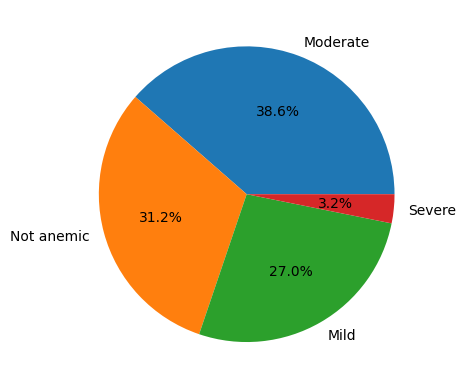

In [ ]:
plt.pie(df["Anemia level.1"].value_counts().values, labels=df["Anemia level.1"].value_counts().index, autopct="%1.1f%%")
plt.show()

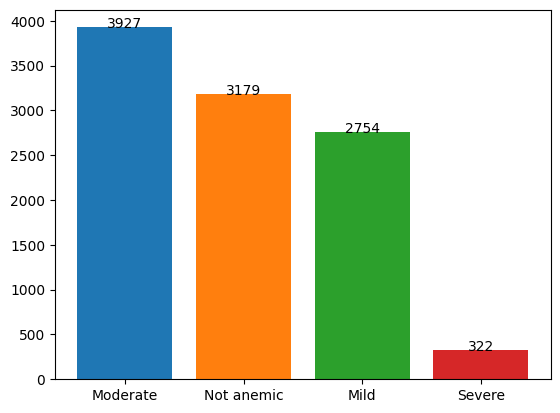

In [ ]:
plt.bar(df["Anemia level.1"].value_counts().index,df["Anemia level.1"].value_counts().values, color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red'])
addLabels(df["Anemia level.1"].value_counts().index,df["Anemia level.1"].value_counts().values)

In [ ]:
df.shape

(33924, 16)

In [ ]:
df.head()

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
0,40-44,Urban,Higher,Richest,1,22,NaN,Yes,No,Living with partner,Staying elsewhere,Immediately,No,NaN,NaN,Yes
1,35-39,Urban,Higher,Richest,1,28,NaN,Yes,No,Married,Living with her,Hours: 1,No,NaN,NaN,No
2,25-29,Urban,Higher,Richest,1,26,NaN,No,No,Married,Living with her,Immediately,No,NaN,NaN,No
3,25-29,Urban,Secondary,Richest,1,25,95.0,Yes,No,Married,Living with her,105.0,No,114.0,Not anemic,No
4,20-24,Urban,Secondary,Richest,1,21,NaN,Yes,No,No longer living together/separated,NaN,Immediately,No,NaN,NaN,No


In [ ]:
df.isna().sum()

,0
Age in 5-year groups,0
Type of place of residence,0
Highest educational level,0
Wealth index combined,0
Births in last five years,0
Age of respondent at 1st birth,0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),20788
Have mosquito bed net for sleeping (from household questionnaire),0
Smokes cigarettes,0
Current marital status,0


# Filling NAN values with Mean or Unknown

In [ ]:
df['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'] = df['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'].fillna(df['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'].mean())
df['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'] = df['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'].fillna(df['Hemoglobin level adjusted for altitude (g/dl - 1 decimal)'].mean())
df['When child put to breast'] = df['When child put to breast'].fillna("Unknown")

In [ ]:
df = df[df["Anemia level.1"].notna()]
df = df[df["Currently residing with husband/partner"].notna()]

In [ ]:
df = df.reset_index()

In [ ]:
df = df.drop(["index"], axis=1)

In [ ]:
df.isna().sum()

,0
Age in 5-year groups,0
Type of place of residence,0
Highest educational level,0
Wealth index combined,0
Births in last five years,0
Age of respondent at 1st birth,0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),0
Have mosquito bed net for sleeping (from household questionnaire),0
Smokes cigarettes,0
Current marital status,0


In [ ]:
df.shape

(9664, 16)

# One Hot Encoding

In [ ]:
listToChange = []
for i in df.columns:
    if isinstance(df[i][0], str):
        if i != "Anemia level.1" and i != "Anemia level":
            listToChange.append(i)
df = pd.get_dummies(df, columns=listToChange, dtype=int)

In [ ]:
df.shape

(9664, 75)

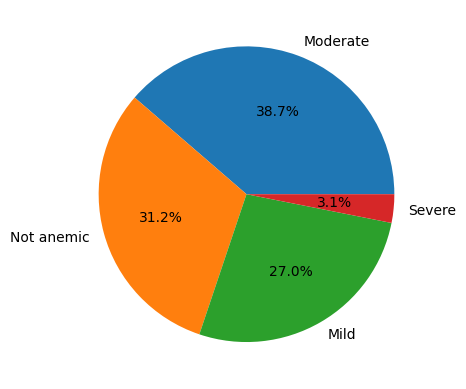

In [ ]:
plt.pie(df["Anemia level.1"].value_counts().values, labels=df["Anemia level.1"].value_counts().index, autopct="%1.1f%%")
plt.show()

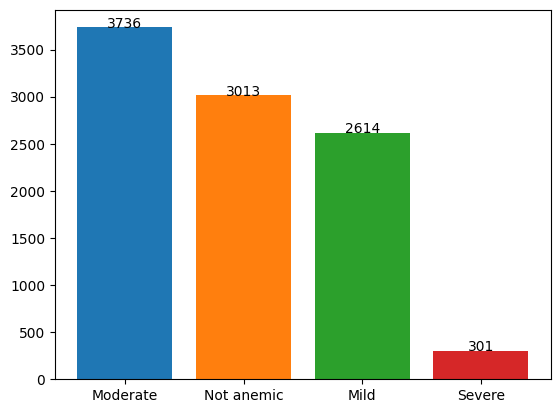

In [ ]:
plt.bar(df["Anemia level.1"].value_counts().index, df["Anemia level.1"].value_counts().values, color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red'])
addLabels(df["Anemia level.1"].value_counts().index,df["Anemia level.1"].value_counts().values)

In [ ]:
!pip install lightgbm

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
X = df.drop(["Anemia level.1"], axis=1)
y = pd.DataFrame(df["Anemia level.1"])

In [ ]:
le = LabelEncoder()
y["Anemia level.1"] = le.fit_transform(y["Anemia level.1"])

<Axes: >

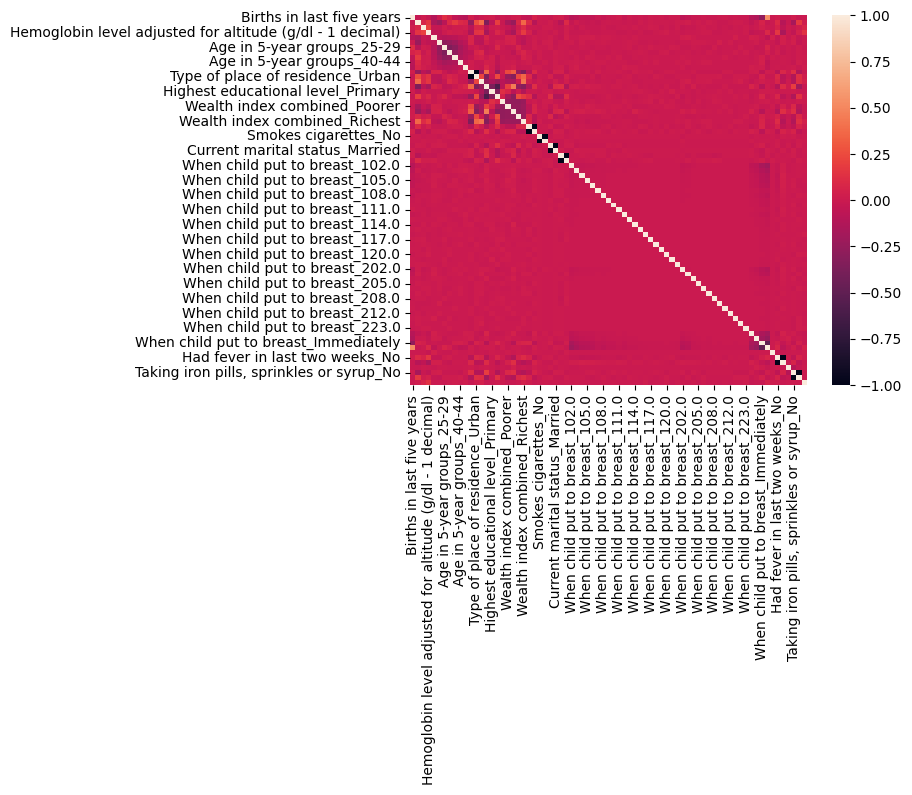

In [ ]:
sns.heatmap(pd.concat([X,y], axis=1).corr())

<BarContainer object of 74 artists>

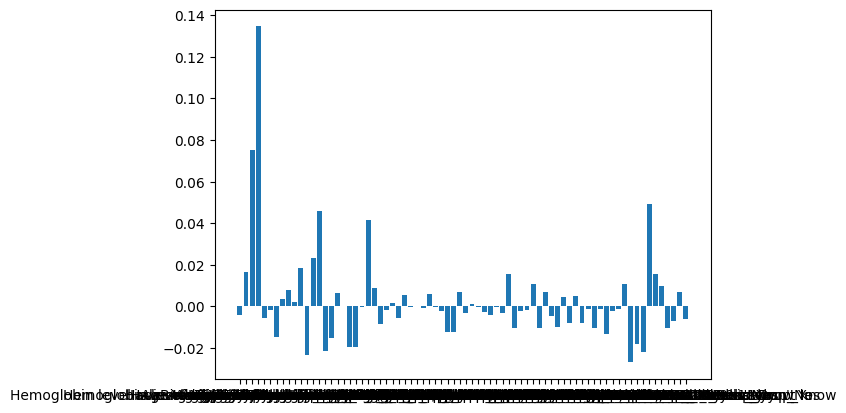

In [ ]:
plt.bar(pd.concat([X,y], axis=1).corr()['Anemia level.1'].index[:-1], pd.concat([X,y], axis=1).corr()['Anemia level.1'].values[:-1])

# Model Selection with Default Models

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=420)

In [ ]:
import re

### SVM Model with Default Parameters

In [ ]:
svm = SVC()

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    svm.fit(X_train, y_train)
    svm_scores = svm.score(X_val, y_val)

0.9812540400775694


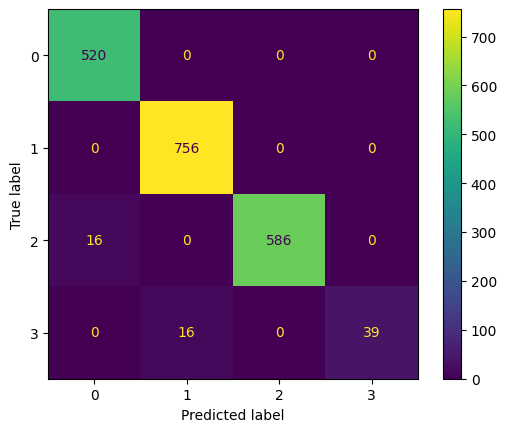

In [ ]:
print(svm_scores)
svm_cm = confusion_matrix(y_true=y_test, y_pred=svm.predict(X_test))
ConfusionMatrixDisplay(svm_cm).plot()

In [ ]:
svm.kernel, svm.C, svm.gamma

('rbf', 1.0, 'scale')

### Random Forest Model with Default Parameters

In [ ]:
rr = RandomForestClassifier()

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    rr.fit(X_train, y_train)
    rr_scores = rr.score(X_val, y_val)

0.9799612152553329


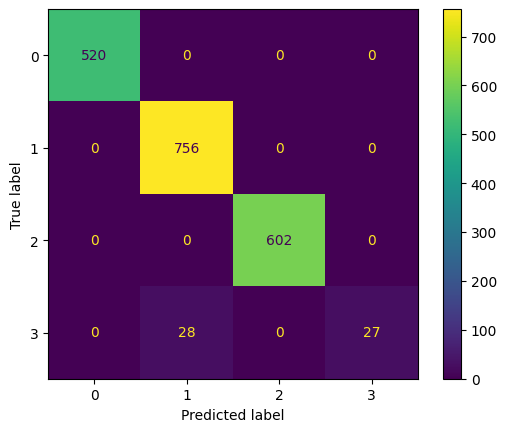

In [ ]:
print(rr_scores)
rf_cm = confusion_matrix(y_true=y_test, y_pred=rr.predict(X_test))
ConfusionMatrixDisplay(rf_cm).plot()

In [ ]:
rr.n_estimators, rr.criterion

(100, 'gini')

### Decision Tree with Default Parameters

In [ ]:
dt = DecisionTreeClassifier()

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    dt.fit(X_train, y_train)
    dt_scores = dt.score(X_val, y_val)

1.0


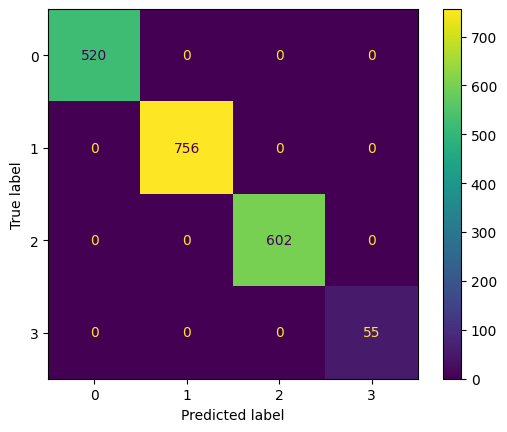

In [ ]:
print(dt_scores)
dt_cm = confusion_matrix(y_true=y_test, y_pred=dt.predict(X_test))
ConfusionMatrixDisplay(dt_cm).plot()

In [ ]:
dt.criterion, dt.splitter

('gini', 'best')

### LightGBM with Default Parameter

In [ ]:
X_train.columns = [re.sub(r'\W+', '_', col) for col in X_train.columns]
X_val.columns = [re.sub(r'\W+', '_', col) for col in X_val.columns]


lgbm_model = LGBMClassifier(random_state=42, force_col_wise=True)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    lgbm_model.fit(X_train, y_train)
    lgbm_scores = lgbm_model.score(X_val, y_val)

[LightGBM] [Info] Total Bins 324
[LightGBM] [Info] Number of data points in the train set: 6184, number of used features: 47
[LightGBM] [Info] Start training from score -1.311540
[LightGBM] [Info] Start training from score -0.938198
[LightGBM] [Info] Start training from score -1.179585
[LightGBM] [Info] Start training from score -3.446517
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

# Model Selection with Hyperparameter Tuning

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### SVM Model with Hyperparameter Tuning

In [ ]:
SVM_C = [0, 1, 4, 9, 16, 25, 36, 49]
SVM_Kernel = ['rbf', 'linear']
SVM_Gamma = ['scale', 'auto']

In [ ]:
svm = SVC()

svm_gs = GridSearchCV(svm, {
    'gamma': SVM_Gamma,
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}, cv=5, return_train_score=False)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    svm_gs.fit(X_train, y_train)
    svm_scores = pd.DataFrame(svm_gs.cv_results_)

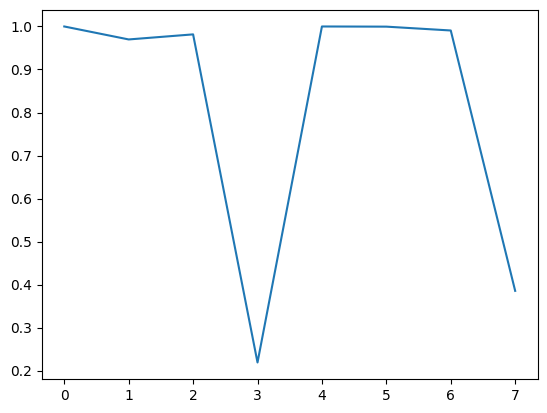

In [ ]:
plt.plot(svm_scores.index, svm_scores.mean_test_score)

In [ ]:
svm_gs.best_params_, svm_gs.best_score_

({'gamma': 'scale', 'kernel': 'linear'}, 1.0)

In [ ]:
confusion_matrix(y_test,svm_gs.best_estimator_.predict(X_test))

array([[520,   0,   0,   0],
       [  0, 756,   0,   0],
       [  0,   0, 602,   0],
       [  0,   0,   0,  55]])

### Radom Forest model with Hyperparameter Tuning

In [ ]:
RR_N_Estimators = [10, 30, 50, 70, 100]
RR_Criterion = ['gini', 'entropy', 'log_loss']

In [ ]:
rr = RandomForestClassifier()

rr_gs = GridSearchCV(rr, {
    'n_estimators': RR_N_Estimators,
    'criterion': RR_Criterion
}, cv=5, return_train_score=False)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    rr_gs.fit(X_train, y_train)
    rr_scores = pd.DataFrame(rr_gs.cv_results_)

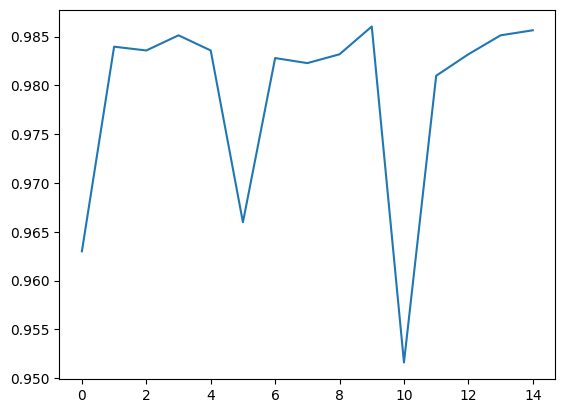

In [ ]:
plt.plot(rr_scores.index, rr_scores.mean_test_score)

In [ ]:
rr_gs.best_params_, rr_gs.best_score_

({'criterion': 'entropy', 'n_estimators': 100}, 0.9860304675158948)

In [ ]:
confusion_matrix(y_true=y_test, y_pred=rr_gs.best_estimator_.predict(X_test))

array([[520,   0,   0,   0],
       [  1, 755,   0,   0],
       [  0,   0, 602,   0],
       [  0,  34,   0,  21]])

### Decision Tree Model with Hyperparameter Tuning

In [ ]:
DT_Criterion = ['gini', 'entropy', 'log_loss']
DT_Splitter = ['best', 'random']

In [ ]:
dt = DecisionTreeClassifier()

dt_gs = GridSearchCV(dt, {
    'criterion': DT_Criterion,
    'splitter': DT_Splitter
}, cv=5, return_train_score=False)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    dt_gs.fit(X_train, y_train)
    dt_scores = pd.DataFrame(dt_gs.cv_results_)

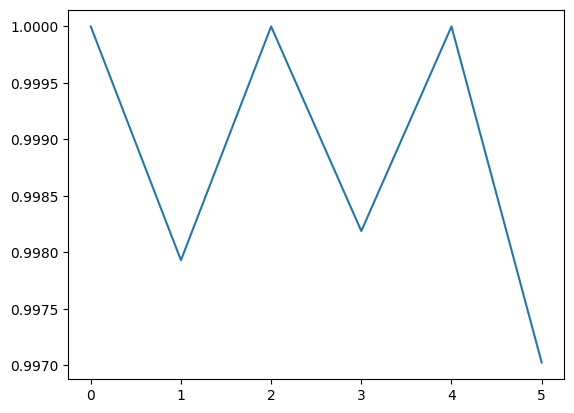

In [ ]:
plt.plot(dt_scores.index, dt_scores.mean_test_score)

In [ ]:
dt_gs.best_params_, dt_gs.best_score_

({'criterion': 'gini', 'splitter': 'best'}, 1.0)

In [ ]:
confusion_matrix(y_true=y_test, y_pred=dt_gs.best_estimator_.predict(X_test))

array([[520,   0,   0,   0],
       [  0, 756,   0,   0],
       [  0,   0, 602,   0],
       [  0,   0,   0,  55]])

### LightGBM With Hyperparameter Tuning

In [ ]:
param_grid = {
    'num_leaves': [5, 20, 31],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150]
}

In [ ]:
X_train.columns = [re.sub(r'\W+', '_', col) for col in X_train.columns]
X_val.columns = [re.sub(r'\W+', '_', col) for col in X_val.columns]

In [ ]:
lgb_classifier = LGBMClassifier(objective='multiclass', num_class=3, boosting_type='gbdt')

# Initialize GridSearchCV for hyperparameters
lgbm_gs = GridSearchCV(estimator=lgb_classifier, param_grid=param_grid,
  scoring='accuracy', cv=5)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    lgbm_gs.fit(X_train, y_train)
    lgbm_scores = pd.DataFrame(lgbm_gs.cv_results_)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

# Getting the best score of each model

In [ ]:
all_the_scores = pd.DataFrame(list([
    svm_gs.best_score_,
    dt_gs.best_score_,
    rr_gs.best_score_,
    lgbm_gs.best_score_
]))

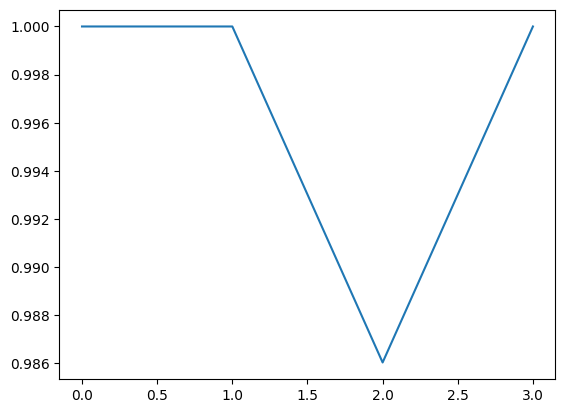

In [ ]:
plt.plot(all_the_scores.index, all_the_scores)

### Report for Best Parameters for Each Models

### 1) SVM

In [ ]:
svm_gs.best_params_

{'gamma': 'scale', 'kernel': 'linear'}

### 2) DT

In [ ]:
dt_gs.best_params_

{'criterion': 'gini', 'splitter': 'best'}

### 3) RR

In [ ]:
rr_gs.best_params_

{'criterion': 'entropy', 'n_estimators': 100}

### 4) LGBM

In [ ]:
lgbm_gs.best_params_

{'learning_rate': 0.05, 'n_estimators': 50, 'num_leaves': 5}

# PCA Dimensionality Reduction with Default Models (n_component Range 2-74)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
max_iter = 0
max_score = 0

### PCA with SVM

In [ ]:
svm_scores = []
for i in range(2, X.shape[1], 5):
    pca = PCA(n_components=i)
    pca_X = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.2, random_state=42)
    svm = SVC()
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        svm.fit(X_train, y_train)
        svm_scores.append(svm.score(X_test, y_test))
        if svm.score(X_test, y_test) > max_score:
          max_iter = i
          max_score = svm.score(X_test, y_test)

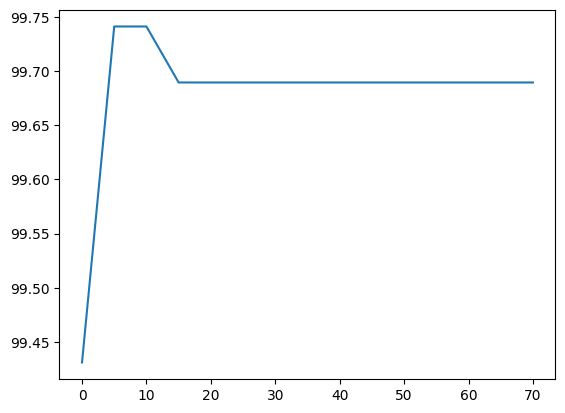

In [ ]:
plt.plot(range(0, 74, 5), list(map(lambda x: x*100, svm_scores)))

In [ ]:
print(max_iter, max_score)

7 0.9974133471288154


### PCA with Decision Tree

In [ ]:
dt_scores = []
for i in range(2, X.shape[1], 5):
    pca = PCA(n_components=i)
    pca_X = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.2, random_state=42)
    dt = DecisionTreeClassifier()
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        dt.fit(X_train, y_train)
        dt_scores.append(dt.score(X_test, y_test))
        if dt.score(X_test, y_test) > max_score:
          max_iter = i
          max_score = dt.score(X_test, y_test)

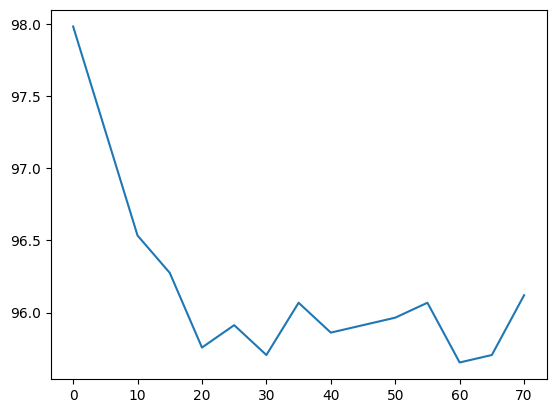

In [ ]:
plt.plot(range(0, 74, 5), list(map(lambda x : x * 100, dt_scores)))

In [ ]:
print(max_iter, max_score)

7 0.9974133471288154


### PCA with Random Forest

In [ ]:
rr_scores = []
for i in range(2, X.shape[1], 5):
    pca = PCA(n_components=i)
    pca_X = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.2, random_state=42)
    rr = RandomForestClassifier()
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        rr.fit(X_train, y_train)
        rr_scores.append(rr.score(X_test, y_test))
        if rr.score(X_test, y_test) > max_score:
          max_iter = i
          max_score = rr.score(X_test, y_test)

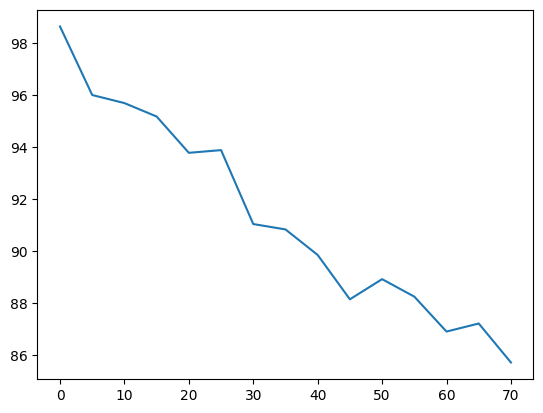

In [ ]:
plt.plot(range(0, 74, 5), list(map(lambda x : x * 100, rr_scores)))

In [ ]:
print(max_iter, max_score)

7 0.9974133471288154


### PCA with LightGBM

In [ ]:
lgbm_scores = []
for i in range(2, X.shape[1], 5):
    pca = PCA(n_components=i)
    pca_X = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.2, random_state=42)
    # X_train.columns = [re.sub(r'\W+', '_', col) for col in X_train.columns]
    # X_test.columns = [re.sub(r'\W+', '_', col) for col in X_test.columns]
    lgbm = LGBMClassifier()
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        lgbm.fit(X_train, y_train)
        lgbm_scores.append(lgbm.score(X_test, y_test))
        if lgbm.score(X_test, y_test) > max_score:
          max_iter = i
          max_score = lgbm.score(X_test, y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 7731, number of used features: 2
[LightGBM] [Info] Start training from score -1.306162
[LightGBM] [Info] Start training from score -0.953315
[LightGBM] [Info] Start training from score -1.165197
[LightGBM] [Info] Start training from score -3.447662
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000974 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 7731, number of used features: 7
[LightGBM] [Info] Start training from score -1.306162
[LightGBM] [Info] Start training from score -0.953315
[LightGBM] [Info] Start trai

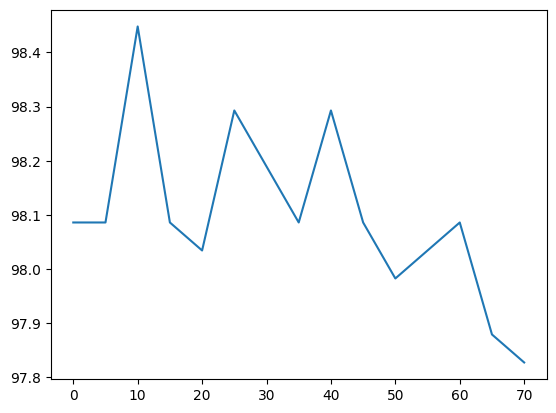

In [ ]:
plt.plot(range(0, 74, 5), list(map(lambda x : x * 100, lgbm_scores)))

In [ ]:
print(max_iter, max_score)

7 0.9974133471288154


# UMAP Dimensionality Reduction with Default Models (n_component Range 2-74)

In [ ]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.3 MB/s eta 0:00:00


In [ ]:
import umap

### UMAP with SVM

In [ ]:
svm_scores = []
for i in range(2, X.shape[1], 5):
    ump = umap.UMAP(n_components=i)
    ump_X = ump.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(ump_X, y, test_size = 0.2, random_state=42)
    svm = SVC()
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        svm.fit(X_train, y_train)
        svm_scores.append(svm.score(X_test, y_test))
        if svm.score(X_test, y_test) > max_score:
          max_iter = i
          max_score = svm.score(X_test, y_test)

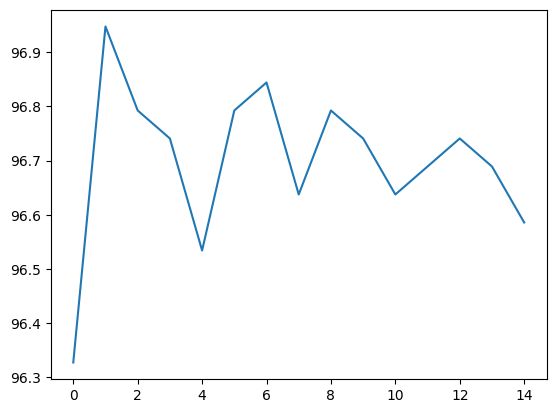

In [ ]:
plt.plot(range(len(svm_scores)), list(map(lambda x : x * 100, svm_scores)))

In [ ]:
max_iter, max_score

(7, 0.9974133471288154)

### UMAP with Decision Tree

In [ ]:
dt_scores = []
for i in range(2, X.shape[1], 5):
    ump = umap.UMAP(n_components=i)
    ump_X = ump.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(ump_X, y, test_size = 0.2, random_state=42)
    dt = DecisionTreeClassifier()
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        dt.fit(X_train, y_train)
        dt_scores.append(dt.score(X_test, y_test))
        if dt.score(X_test, y_test) > max_score:
          max_iter = i
          max_score = dt.score(X_test, y_test)

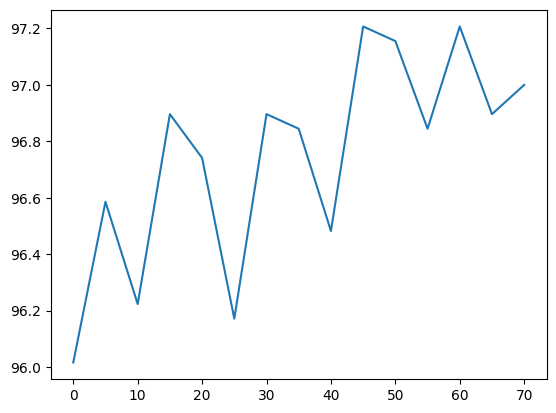

In [ ]:
plt.plot(range(0, 74, 5), list(map(lambda x : x * 100, dt_scores)))

In [ ]:
max_iter, max_score

(7, 0.9974133471288154)

### UMAP with Random Forest

In [ ]:
rr_scores = []
for i in range(2, X.shape[1], 5):
    ump = umap.UMAP(n_components=i)
    ump_X = ump.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(ump_X, y, test_size = 0.2, random_state=42)
    rr = RandomForestClassifier()
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        rr.fit(X_train, y_train)
        rr_scores.append(rr.score(X_test, y_test))
        if rr.score(X_test, y_test) > max_score:
          max_iter = i
          max_score = rr.score(X_test, y_test)

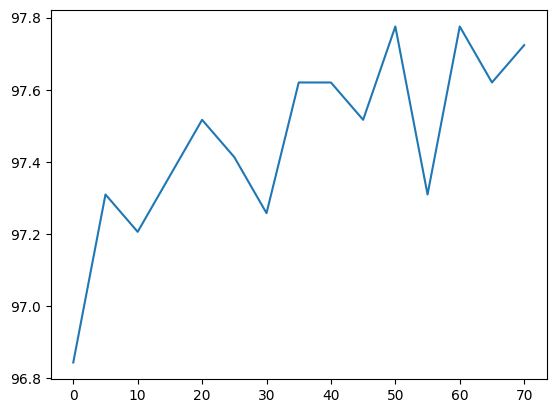

In [ ]:
plt.plot(range(0, 74, 5), list(map(lambda x : x * 100, rr_scores)))

In [ ]:
max_iter, max_score

(7, 0.9974133471288154)

### UMAP with LightGBM

In [ ]:
lgbm_scores = []
for i in range(2, 15, 5):
    ump = umap.UMAP(n_components=i)
    ump_X = ump.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(ump_X, y, test_size = 0.2, random_state=42)
    lgbm = LGBMClassifier()
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        lgbm.fit(X_train, y_train)
        lgbm_scores.append(lgbm.score(X_test, y_test))
        if lgbm.score(X_test, y_test) > max_score:
          max_iter = i
          max_score = lgbm.score(X_test, y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 7731, number of used features: 2
[LightGBM] [Info] Start training from score -1.306162
[LightGBM] [Info] Start training from score -0.953315
[LightGBM] [Info] Start training from score -1.165197
[LightGBM] [Info] Start training from score -3.447662
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000641 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 7731, number of used features: 7
[LightGBM] [Info] Start training from score -1.306162
[LightGBM] [Info] Start training from score -0.953315
[LightGBM] [Info] Start trai

In [ ]:
plt.plot(range(0, 15, 5), list(map(lambda x : x * 100, lgbm_scores)))

In [ ]:
max_iter, max_score